### 로지스틱 회귀로 다중 분류 수행하기 

In [1]:
import pandas as pd
# 1. 데이터 블러오기
fish = pd.read_csv('https://bit.ly/fish_csv_data')
# 2. 입력과 타깃 구분
fish_input = fish[['Weight','Length','Diagonal','Height','Width']]
fish_target = fish['Species']

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

# 4. 데이터 표준화 (스케일링)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# # 5. 도미(Bream)와 빙어(Smelt)만 선택
# bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
# train_bream_smelt = train_scaled[bream_smelt_indexes]
# target_bream_smelt = train_target[bream_smelt_indexes]

# # 로지스틱 회귀 사용하기 
# from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression()
# lr.fit(train_bream_smelt, target_bream_smelt)

# decisions = lr.decision_function(train_bream_smelt[:5])
# print(decisions)

# from scipy.special import expit
# print(expit(decisions))

In [2]:
# 로지스틱 회귀 사용하기 (다중분류 수해하기
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀는 기본적으로 릿지 회귀와 같이 계수의 제곱을 규제한다.(L2 규제)
# 릿지 회귀는 alpha 매개변수로 규제약을 조절한다. alpha가 커지면 규제도 커진다.
# 로지스틱 회귀에서 규제를 제어하는 매개변수는 C 이다. 작을 수록 규제가 커진다. (c의 기본은 1이다.)
# 규제 완화를 위해 20,  max_iter는 반복 횟
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [3]:
# 테스트 세트 처음 5개
print(lr.predict(test_scaled[:5]))
# ['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
# ['퍼치' '스멜트' '파이크' '로치' '퍼치']
# ['농어', '빙어', '강꼬치고기', '붕어', '농어']ㄴ

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [4]:
import numpy as np
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [5]:
# 클래스 정보 확인 
print(lr.classes_)

# ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
# 즉 첫번째 샘플은 0.842 => 'Perch' 이라는 것

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [6]:
# 선형 방정
# coef_.shape : 7개의 클래스(물고기 종),  5개 입력 특성 
#               각 클래스별 가중치(weight)
# intercept_ : 절편값
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


#### 앞에서는 **이진분류** 에서는 **시그모이드 함수** 사용
#### 지금은 **다중분류** 에서는 **소프트맥스 함수** 사용 
> - 공통점 : 출력범위 : 0 ~ 1 사이 <br>
> - 시그모이드 : 입력 => 하나의 실수,    소프트맥스: 입력 => 여러개 [z1, z2,..] ,

In [7]:
## z1 ~ z7의 값을 구해보자 
## decision_function()은 로지스틱 회귀(Logistic Regression) 의 “내부 점수(raw score)”를 보여주는 중요한 메서드
## decision_function()의 의미 : 모델이 각 클래스에 대해 계산한 선형결합 점수
## 이진 분류 : decision = lr.decision_function(X)
## 다중분류 : decision = lr.decision_function(test_scaled[:5])
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


In [8]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


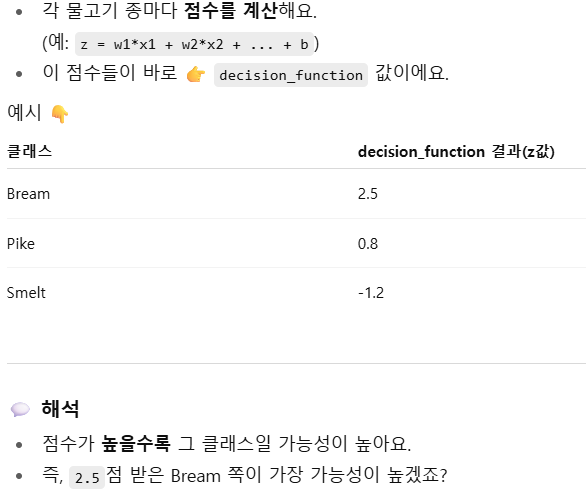

In [9]:
from IPython.display import Image, display
display(Image(filename="img/img42.png", width=600, height=400))

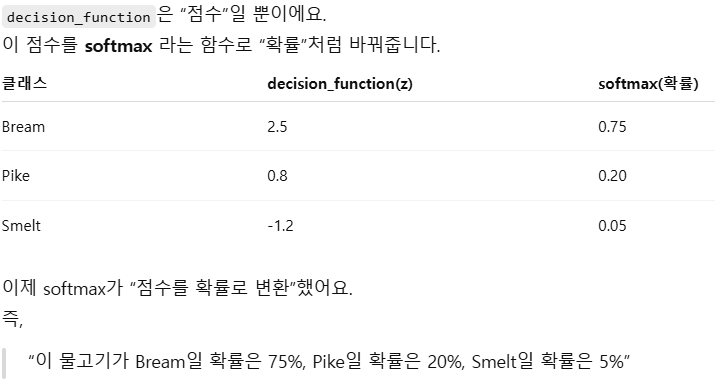

In [10]:
display(Image(filename="img/img43.png", width=600, height=400))

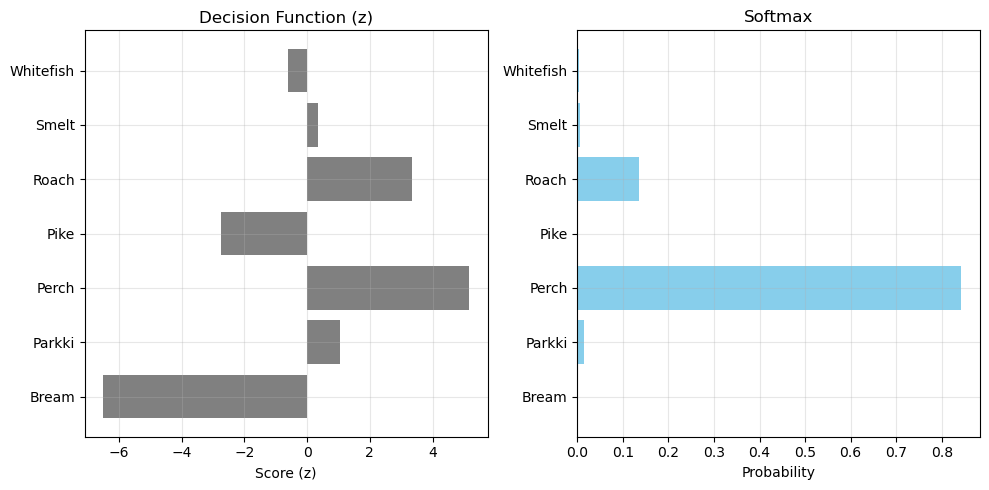

In [11]:
import matplotlib.pyplot as plt
# 5️⃣ 시각화
# 확률 계산 전에 나온 원래 선형 결합 결과값
plt.figure(figsize=(10,5))

# subplot 1: decision_function 값
plt.subplot(1,2,1)
plt.barh(lr.classes_, decision[0], color='gray')
plt.title("Decision Function (z)")
plt.xlabel("Score (z)")
plt.grid(alpha=0.3)

# subplot 2: softmax 확률
plt.subplot(1,2,2)
plt.barh(lr.classes_, proba[0], color='skyblue')
plt.title("Softmax")
plt.xlabel("Probability")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

###  모델 성능을 제대로 해석·개선  단계

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

pred_all = lr.predict(test_scaled)
cm = confusion_matrix(test_target, pred_all, labels=lr.classes_)
print("분류 리포트\n")
print(classification_report(test_target, pred_all, target_names=lr.classes_))


분류 리포트

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        11
      Parkki       1.00      1.00      1.00         2
       Perch       0.92      1.00      0.96        12
        Pike       1.00      1.00      1.00         4
       Roach       0.60      1.00      0.75         3
       Smelt       1.00      1.00      1.00         5
   Whitefish       0.00      0.00      0.00         3

    accuracy                           0.93        40
   macro avg       0.79      0.86      0.82        40
weighted avg       0.87      0.93      0.89        40



C:\Users\ict\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ict\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ict\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


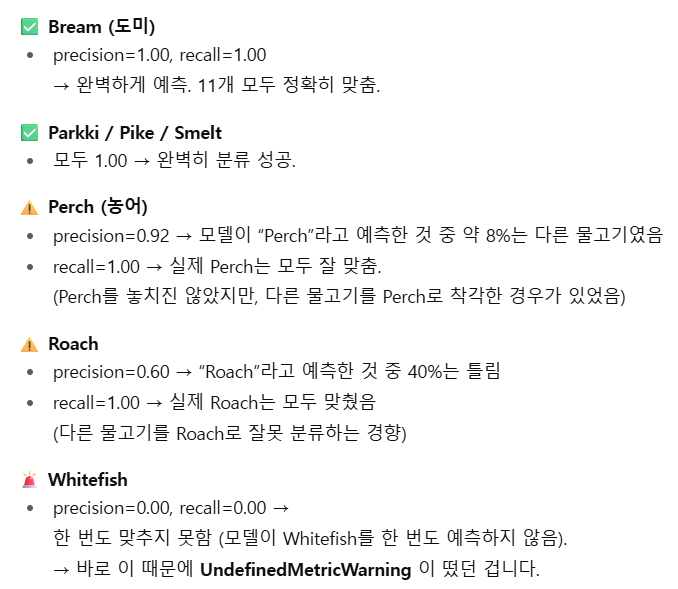

In [13]:
display(Image(filename="img/img44.png", width=600, height=400))

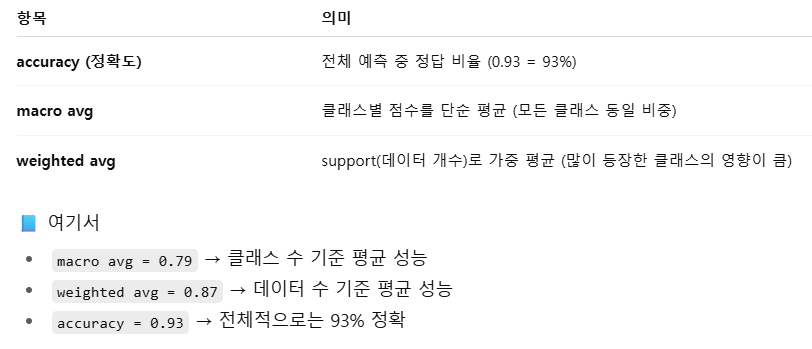

In [14]:
display(Image(filename="img/img45.png", width=800, height=600))

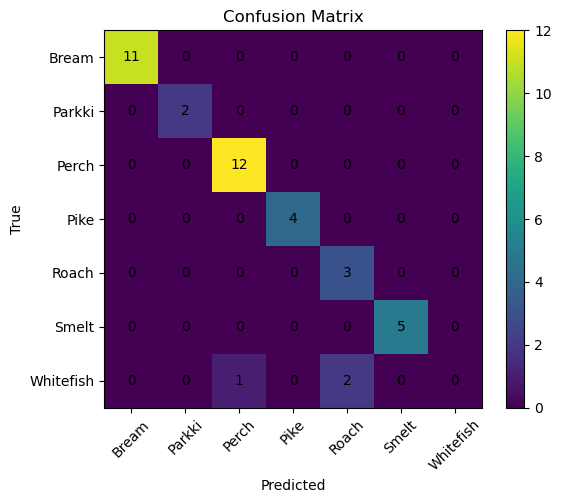

In [15]:
# 간단 시각화(가로/세로: 클래스 순서 lr.classes_)
plt.figure(figsize=(6,5))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(lr.classes_))
plt.xticks(tick_marks, lr.classes_, rotation=45)
plt.yticks(tick_marks, lr.classes_)
plt.xlabel("Predicted"); plt.ylabel("True")
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.tight_layout()
plt.show()

In [16]:
import pandas as pd
proba_head = lr.predict_proba(test_scaled[:10])
proba_df = pd.DataFrame(np.round(proba_head, 3), columns=lr.classes_)
proba_df["true"]  = test_target.iloc[:10].values
proba_df["pred"]  = lr.predict(test_scaled[:10])
proba_df

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish,true,pred
0,0.000,0.014,0.842,0.000,0.135,0.007,0.003,Perch,Perch
1,0.000,0.003,0.044,0.000,0.007,0.946,0.000,Smelt,Smelt
2,0.000,0.000,0.034,0.934,0.015,0.016,0.000,Pike,Pike
3,0.011,0.034,0.305,0.006,0.567,0.000,0.076,Whitefish,Roach
4,0.000,0.000,0.904,0.002,0.089,0.002,0.001,Perch,Perch
5,0.999,0.000,0.000,0.000,0.000,0.000,0.000,Bream,Bream
6,0.000,0.001,0.050,0.000,0.004,0.945,0.000,Smelt,Smelt
7,0.001,0.007,0.319,0.014,0.639,0.001,0.018,Roach,Roach
8,0.000,0.002,0.803,0.002,0.181,0.000,0.011,Perch,Perch
9,0.000,0.000,0.022,0.978,0.000,0.000,0.000,Pike,Pike
